# Analysis on Movielens Dataset

### Importing Libraries

In [1]:
from pandas import DataFrame as df
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('precision', 3)

### Loading the Data set

In [3]:
import pandas as pd

unames = ['User_ID', 'Gender', 'Age', 'Occupation', 'Zip']
users = pd.read_table('Desktop/ml-1m/users.dat', sep='::', header=None,
names=unames,engine = 'python')

rnames = ['User_ID', 'Movie_ID', 'Rating', 'Timestamp']
ratings = pd.read_table('Desktop/ml-1m/ratings.dat', sep='::', header=None,
names=rnames, engine = 'python')

mnames = ['Movie_ID', 'Title', 'Genres']
movies = pd.read_table('Desktop/ml-1m/movies.dat', sep='::', header=None,
names=mnames, engine = 'python')

In [4]:
users.head()

,User_ID,Gender,Age,Occupation,Zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings.head()

,User_ID,Movie_ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movies.head()

,Movie_ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### Merging three different Datasets

In [7]:
data = pd.merge(pd.merge(users,ratings),movies)

In [8]:
data

,User_ID,Gender,Age,Occupation,Zip,Movie_ID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,F,18,3,95825,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,M,1,10,48073,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,F,25,7,10023,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,F,25,1,14607,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,M,45,3,55421,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama


### Most Rated Movies

#### Grouping the database table by title and their total number of ratings

In [9]:
most_rated = data.groupby('Title').size().sort_values(ascending = False)
mr = df(most_rated, columns=['Total Rating'])
mr[:10]

,Total Rating
Title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
Saving Private Ryan (1998),2653
Terminator 2: Judgment Day (1991),2649
"Matrix, The (1999)",2590
Back to the Future (1985),2583


### Least Rated Movies

In [10]:
least_rated = mr[::-1]
least_rated[:10]

,Total Rating
Title,
Another Man's Poison (1952),1
Night Tide (1961),1
Shadows (Cienie) (1988),1
"McCullochs, The (1975)",1
Anna (1996),1
Target (1995),1
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971),1
Tashunga (1995),1
Waltzes from Vienna (1933),1


### Average Rating by User

#### Average rating and  total counting of every movie

In [11]:
meanratings_by_user = data.groupby('Title').agg({'Rating': {'Count': np.size,'Mean': np.mean}})
meanratings_by_user.head()

Rating      
                                Mean Count
Title                                     
$1,000,000 Duck (1971)         3.027    37
'Night Mother (1986)           3.371    70
'Til There Was You (1997)      2.692    52
'burbs, The (1989)             2.911   303
...And Justice for All (1979)  3.714   199

### Top most Rated Movies and their Average Rating

In [12]:
df(meanratings_by_user['Rating'].sort_values(by = 'Count', ascending =False)).head()

,Mean,Count
Title,,
American Beauty (1999),4.317,3428
Star Wars: Episode IV - A New Hope (1977),4.454,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.293,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.023,2883
Jurassic Park (1993),3.764,2672


### Movies with mean Rating greater than 4

In [13]:
df(meanratings_by_user[meanratings_by_user['Rating', 'Mean'] >= 4][:10])

Rating      
                                                 Mean Count
Title                                                      
12 Angry Men (1957)                             4.295   616
2001: A Space Odyssey (1968)                    4.069  1716
24 7: Twenty Four Seven (1997)                  4.000     5
39 Steps, The (1935)                            4.075   253
400 Blows, The (Les Quatre cents coups) (1959)  4.321   187
42 Up (1998)                                    4.227    88
8 1/2 (1963)                                    4.105   228
African Queen, The (1951)                       4.252  1057
After Life (1998)                               4.088   102
Alien (1979)                                    4.160  2024

### Average Rating Of movies by Gender

#### ->Pivoting the gender column to show average rating given on every movie
#### based on gender

In [14]:
meanratings_by_gender = data.pivot_table('Rating', index = ['Movie_ID','Title'], columns = 'Gender', aggfunc = 'mean')

In [15]:
meanratings_by_gender[:10]

,Gender,F,M
Movie_ID,Title,,
1,Toy Story (1995),4.188,4.131
2,Jumanji (1995),3.278,3.175
3,Grumpier Old Men (1995),3.074,2.994
4,Waiting to Exhale (1995),2.976,2.482
5,Father of the Bride Part II (1995),3.213,2.888
6,Heat (1995),3.682,3.910
7,Sabrina (1995),3.588,3.268
8,Tom and Huck (1995),3.357,2.775
9,Sudden Death (1995),2.100,2.717


#### ->Difference of opinion between male and female on every movie
#### using  their average ratings

In [16]:
meanratings_by_gender['Difference'] = meanratings_by_gender.M - meanratings_by_gender.F
meanratings_by_gender.head()

,Gender,F,M,Difference
Movie_ID,Title,,,
1,Toy Story (1995),4.188,4.131,-0.057
2,Jumanji (1995),3.278,3.175,-0.103
3,Grumpier Old Men (1995),3.074,2.994,-0.079
4,Waiting to Exhale (1995),2.976,2.482,-0.494
5,Father of the Bride Part II (1995),3.213,2.888,-0.325


In [17]:
meanratings_by_gender.reset_index('Movie_ID', inplace=True)

In [18]:
top_50 = data.groupby('Movie_ID').size().sort_values(ascending=False)[:50]

#### Plotting of Bar graph of differnce in ratings by gender

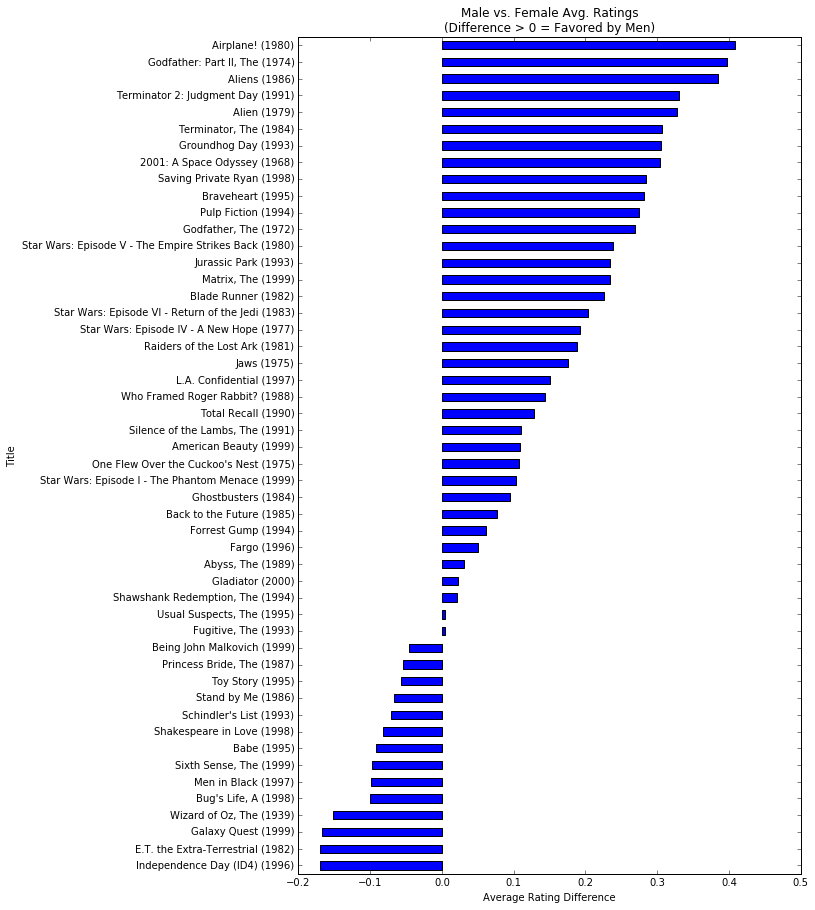

In [19]:
variation = meanratings_by_gender[meanratings_by_gender.Movie_ID.isin(top_50.index)]['Difference']
variation.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference')

## Average Rating by Age Group

##     Given Age Range
###     1:  "Under 18"   18:  "18-24"
### 	25:  "25-34"       35:  "35-44"
### 	45:  "45-49"       50:  "50-55"
### 	56:  "56+"

In [20]:
temp = data.pivot_table('Rating', index = ['User_ID', 'Title'], columns='Age', aggfunc='mean')
temp.fillna(0)[:10]

Age                                  1   18  25  35  45  50  56
User_ID Title                                                  
1       Airplane! (1980)              4   0   0   0   0   0   0
        Aladdin (1992)                4   0   0   0   0   0   0
        Antz (1998)                   4   0   0   0   0   0   0
        Apollo 13 (1995)              5   0   0   0   0   0   0
        Awakenings (1990)             5   0   0   0   0   0   0
        Back to the Future (1985)     5   0   0   0   0   0   0
        Bambi (1942)                  4   0   0   0   0   0   0
        Beauty and the Beast (1991)   5   0   0   0   0   0   0
        Ben-Hur (1959)                5   0   0   0   0   0   0
        Big (1988)                    4   0   0   0   0   0   0

In [21]:
temp.query('User_ID == [69, 135]').fillna(0)

Age                                                         1   18  25  35  \
User_ID Title                                                                
69      Affliction (1997)                                    0   0   4   0   
        All About My Mother (Todo Sobre Mi Madre) (1999)     0   0   5   0   
        American Beauty (1999)                               0   0   5   0   
        American History X (1998)                            0   0   4   0   
        Angels and Insects (1995)                            0   0   2   0   
        As Good As It Gets (1997)                            0   0   4   0   
        Boat, The (Das Boot) (1981)                          0   0   4   0   
        Boogie Nights (1997)                                 0   0   5   0   
        Bound (1996)                                         0   0   5   0   
        Bronx Tale, A (1993)                                 0   0   4   0   
        Butcher Boy, The (1998)                              0   0   2   0   
        Carlito's Way (1993)                                 0   0   5   0   
        Cider House Rules, The (1999)                        0   0   4   0   
        Contact (1997)                                       0   0   2   0   
        Crimson Tide (1995)                                  0   0   4   0   
        Cry, the Beloved Country (1995)                      0   0   5   0   
        Dances with Wolves (1990)                            0   0   2   0   
        Donnie Brasco (1997)                                 0   0   4   0   
        Down in the Delta (1998)                             0   0   2   0   
        Eat Drink Man Woman (1994)                           0   0   5   0   
        Elizabeth (1998)                                     0   0   5   0   
        English Patient, The (1996)                          0   0   5   0   
        Farewell My Concubine (1993)                         0   0   4   0   
        Flower of My Secret, The (La Flor de Mi Secreto...   0   0   5   0   
        Forrest Gump (1994)                                  0   0   4   0   
        Gattaca (1997)                                       0   0   5   0   
        Glengarry Glen Ross (1992)                           0   0   5   0   
        Good Will Hunting (1997)                             0   0   5   0   
        Henry Fool (1997)                                    0   0   3   0   
        Ice Storm, The (1997)                                0   0   4   0   
...                                                         ..  ..  ..  ..   
135     Mystery Men (1999)                                   0   4   0   0   
        Office Space (1999)                                  0   5   0   0   
        Powder (1995)                                        0   3   0   0   
        Prince of Egypt, The (1998)                          0   4   0   0   
        Princess Bride, The (1987)                           0   5   0   0   
        Pushing Tin (1999)                                   0   4   0   0   
        Red Violin, The (Le Violon rouge) (1998)             0   5   0   0   
        Romy and Michele's High School Reunion (1997)        0   1   0   0   
        Run Lola Run (Lola rennt) (1998)                     0   5   0   0   
        Runaway Bride (1999)                                 0   2   0   0   
        Rushmore (1998)                                      0   5   0   0   
        Scream 3 (2000)                                      0   1   0   0   
        Shaggy Dog, The (1959)                               0   3   0   0   
        Shakespeare in Love (1998)                           0   5   0   0   
        Sixth Sense, The (1999)                              0   5   0   0   
        Sleepy Hollow (1999)                                 0   3   0   0   
        South Park: Bigger, Longer and Uncut (1999)          0   5   0   0   
        Star Wars: Episode VI - Return of the Jedi (1983)    0   5   0   0   
        Stigmata (1999

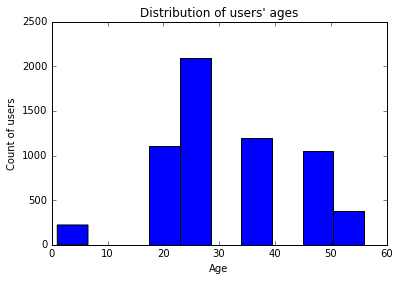

In [22]:
users.Age.plot.hist()
plt.title("Distribution of users' ages")
plt.ylabel('Count of users')
plt.xlabel('Age');

# User Defined Age Range

In [23]:
Age_Group = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
data['Age_Group'] = pd.cut(data.Age, range(0, 71, 10), labels=Age_Group)
data[['Age','Age_Group']].head()

,Age,Age_Group
0,1,0-9
1,56,50-59
2,25,20-29
3,25,20-29
4,50,40-49


#### Calculating the mean ratings based on different age groups

In [24]:
mean_ratings_by_age = data.pivot_table('Rating', index = 'Title', columns='Age_Group', aggfunc='mean')

In [25]:
mean_ratings_by_age.fillna(0)[:15]

Age_Group,0-9,10-19,20-29,30-39,40-49,50-59,60-69
Title,,,,,,,
"$1,000,000 Duck (1971)",0.000,3.000,3.091,3.133,2.600,0.000,0
'Night Mother (1986),2.000,4.667,3.423,2.905,3.667,4.333,0
'Til There Was You (1997),3.500,2.500,2.667,2.900,2.400,2.667,0
"'burbs, The (1989)",4.500,3.244,2.652,2.818,3.000,2.667,0
...And Justice for All (1979),3.000,3.429,3.724,3.657,3.776,3.929,0
1-900 (1994),0.000,0.000,2.000,0.000,0.000,3.000,0
10 Things I Hate About You (1999),3.745,3.415,3.433,3.103,3.431,4.000,0
101 Dalmatians (1961),3.514,3.295,3.614,3.826,3.819,3.190,0
101 Dalmatians (1996),3.088,2.468,2.929,3.280,3.444,3.556,0


In [26]:
mean_ratings_by_age['20-29'].count()

3508

#### Plotting the Histogram for Age group's average ratings

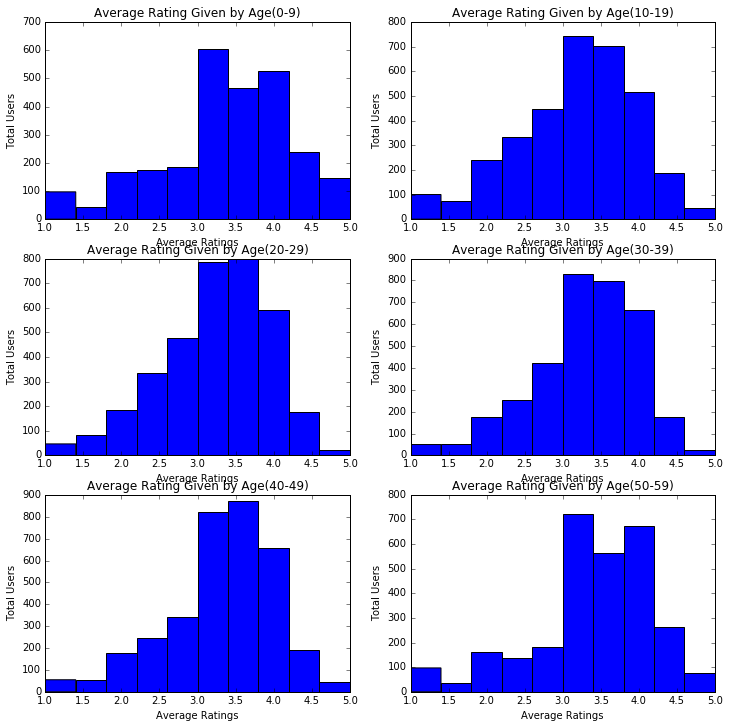

In [27]:
plt.subplot(3, 2, 1)
mean_ratings_by_age['0-9'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(0-9)')

plt.subplot(3, 2, 2)
mean_ratings_by_age['10-19'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(10-19)')

plt.subplot(3, 2, 3)
mean_ratings_by_age['20-29'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(20-29)')

plt.subplot(3, 2, 4)
mean_ratings_by_age['30-39'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(30-39)')

plt.subplot(3, 2, 5)
mean_ratings_by_age['40-49'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(40-49)')

plt.subplot(3, 2, 6)
mean_ratings_by_age['50-59'].plot(kind = 'hist', figsize = [12, 12])
plt.xlabel('Average Ratings')
plt.ylabel('Total Users')
plt.title('Average Rating Given by Age(50-59)')

### Statistics Measures Of Ratings

In [28]:
mean_ratings_by_age.describe().fillna(0)

Age_Group,0-9,10-19,20-29,30-39,40-49,50-59,60-69
count,2650.000,3393.000,3508.000,3447.000,3458.000,2913.00,0
mean,3.350,3.165,3.231,3.287,3.309,3.37,0
std,0.890,0.792,0.717,0.698,0.713,0.82,0
min,1.000,1.000,1.000,1.000,1.000,1.00,0
25%,2.937,2.682,2.793,2.904,2.966,3.00,0
50%,3.486,3.250,3.314,3.375,3.428,3.50,0
75%,4.000,3.744,3.758,3.803,3.818,4.00,0
max,5.000,5.000,5.000,5.000,5.000,5.00,0


### Average Rating by Occupation

In [29]:
Name = ['Other', 'academic/educator', 'artist','clerical/admin','college/grad student','customer service',
              'doctor/health care','executive/managerial','farmer','homemaker','K-12 student','lawyer',
              'programmer','retired','sales/marketing','scientist','self-employed','technician/engineer','tradesman/craftsman',
              'unemployed','writer']
data['Name'] = pd.cut(data.Occupation, range(22), labels=Name)
data[['Occupation','Name']].head()

,Occupation,Name
0,10,homemaker
1,16,scientist
2,12,lawyer
3,7,doctor/health care
4,1,Other


#### Table for average rating based on different defined ocuupation

In [30]:
mean_ratings_by_occupation = data.pivot_table('Rating', index = 'Title', columns='Name', aggfunc='mean')

In [31]:
mean_ratings_by_occupation.fillna(0).head()

Name,Other,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",2.167,0.000,4.000,2.800,4.000,3.000,3.000,0,3.667,0.0,...,1.000,2.000,0.000,0.0,5.000,3.500,0.00,3.5,2.333,0
'Night Mother (1986),3.714,3.000,3.400,3.667,3.750,3.500,3.545,0,0.000,1.0,...,0.000,4.667,3.500,3.5,3.000,2.500,4.50,0.0,3.000,0
'Til There Was You (1997),2.667,2.500,2.200,3.333,0.000,2.000,2.857,0,0.000,3.5,...,3.000,4.000,2.600,0.0,1.500,4.000,1.00,2.0,2.333,0
"'burbs, The (1989)",2.958,2.950,2.833,3.022,2.917,2.625,2.615,5,2.800,5.0,...,2.933,0.000,3.250,3.2,2.833,3.000,3.10,3.4,3.000,0
...And Justice for All (1979),3.650,3.833,2.875,3.444,3.750,3.889,3.848,0,3.500,3.0,...,3.500,4.000,3.538,4.0,4.000,4.091,3.75,4.0,3.714,0


In [32]:
df(mean_ratings_by_occupation.describe().ix[:2])

Name,Other,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,lawyer,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
count,3218.000,3145.000,2952.000,3363.00,2632.000,3011.000,3269.000,1445.000,2192.000,2455.000,...,2925.000,2340.000,2953.000,2517.000,3123.000,3087.000,2449.000,2679.000,3330.000,0
mean,3.215,3.256,3.402,3.19,3.357,3.326,3.264,3.355,3.487,3.364,...,3.392,3.461,3.345,3.382,3.352,3.322,3.362,3.143,3.147,NaN


### Most Waching Occupation

#### Calculation of most watching occupation based on total rating count

In [33]:
most_watching_occupation = data.groupby('Name').size().sort_values(ascending = False)
mwo = df(most_watching_occupation, columns = ['Total Ratings'])
mwo

,Total Ratings
Name,
clerical/admin,131032
doctor/health care,105425
Other,85351
self-employed,72816
unemployed,60397
lawyer,57214
academic/educator,50068
retired,49109
scientist,46021


#### Plotting the Bar Graph for Occupation versus total ratings

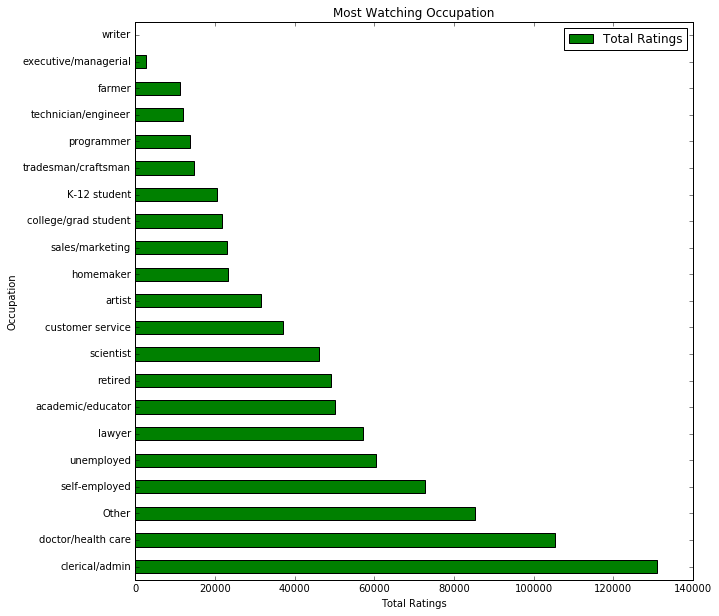

In [34]:
mwo.plot(kind = 'barh', color = 'green', figsize=[10,10])
plt.xlabel('Total Ratings')
plt.ylabel('Occupation')
plt.title('Most Watching Occupation')

In [35]:
df(mean_ratings_by_occupation['Other'][:10]).fillna(0)

,Other
Title,
"$1,000,000 Duck (1971)",2.167
'Night Mother (1986),3.714
'Til There Was You (1997),2.667
"'burbs, The (1989)",2.958
...And Justice for All (1979),3.650
1-900 (1994),0.000
10 Things I Hate About You (1999),3.463
101 Dalmatians (1961),3.627
101 Dalmatians (1996),3.118


## Generes

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

### Average Rating of Genre

In [36]:
total_diff_genre_movies = data.groupby('Genres').agg({'Rating': {'Count': np.size,'Mean': np.mean}})
total_diff_genre_movies

Rating       
                                                Mean  Count
Genres                                                     
Action                                         3.355  12311
Action|Adventure                               3.677  10446
Action|Adventure|Animation                     4.148    345
Action|Adventure|Animation|Children's|Fantasy  2.704    135
Action|Adventure|Animation|Horror|Sci-Fi       3.547    618
Action|Adventure|Children's                    1.318     44
Action|Adventure|Children's|Comedy             2.307    518
Action|Adventure|Children's|Fantasy            2.091     44
Action|Adventure|Children's|Sci-Fi             1.874    350
Action|Adventure|Comedy                        3.095   2077
Action|Adventure|Comedy|Crime                  3.137   2573
Action|Adventure|Comedy|Horror                 3.827    548
Action|Adventure|Comedy|Horror|Sci-Fi          3.804    945
Action|Adventure|Comedy|Romance                3.862   5736
Action|Adventure|Comedy|Sci-Fi                 3.740   2538
Action|Adventure|Comedy|War                    2.277    213
Action|Adventure|Crime                         2.925   1862
Action|Adventure|Crime|Drama                   3.601   1431
Action|Adventure|Crime|Thriller                2.782    216
Action|Adventure|Drama                         3.270   1643
Action|Adventure|Drama|Romance                 2.950    362
Action|Adventure|Drama|Sci-Fi|War              4.293   2990
Action|Adventure|Drama|Thriller                3.423    201
Action|Adventure|Fantasy                       3.220   1989
Action|Adventure|Fantasy|Sci-Fi                3.904   6211
Action|Adventure|Horror                        3.378   1932
Action|Adventure|Horror|Thriller               3.322   1007
Action|Adventure|Mystery                       3.424   1906
Action|Adventure|Mystery|Sci-Fi                2.239    565
Action|Adventure|Romance                       3.419   1129
...                                              ...    ...
Film-Noir|Sci-Fi                               4.273   1800
Film-Noir|Sci-Fi|Thriller                      3.823    874
Film-Noir|Thriller                             4.207   1983
Horror                                         3.072  22563
Horror|Mystery                                 2.745    102
Horror|Mystery|Thriller                        2.912   2014
Horror|Romance                                 3.457   1900
Horror|Sci-Fi                                  3.057   7438
Horror|Sci-Fi|Thriller                         2.727   1504
Horror|Thriller                                3.200   8649
Musical                                        3.797   3211
Musical|Romance                                3.947   3178
Musical|Romance|War                            3.614    280
Musical|War                                    3.903    443
Mystery                                        3.786   1168
Mystery|Romance|Thriller                       3.609    955
Mystery|Sci-Fi                                 3.439    522
Mystery|Sci-Fi|Thriller                        3.493    996
Mystery|Thriller                               3.891   6596
Romance                                        3.391   2077
Romance|Thriller                               3.875    562
Romance|War                                    3.385    130
Romance|Western                                3.651     63
Sci-Fi                                         3.594   5115
Sci-Fi|Thriller                                3.028   4702
Sci-Fi|Thriller|War                            3.439    280
Sci-Fi|War                                     4.450   1367
Thriller                                       3.556  17851
War                                            3.889    991
Western                                        3.853   5689

[301 rows x 2 columns]

In [37]:
total_diff_genre_movies.loc['Comedy']

Rating  Mean          3.464
        Count    116883.000
Name: Comedy, dtype: float64

### Most Watched(Rated) Genre

In [38]:
mwg = df(total_diff_genre_movies['Rating']['Count'].sort_values(ascending = False))
mwg[:10]

,Count
Genres,
Comedy,116883
Drama,111423
Comedy|Romance,42712
Comedy|Drama,42245
Drama|Romance,29170
Action|Thriller,26759
Horror,22563
Drama|Thriller,18248
Thriller,17851


#### Plotting of most watched Genre

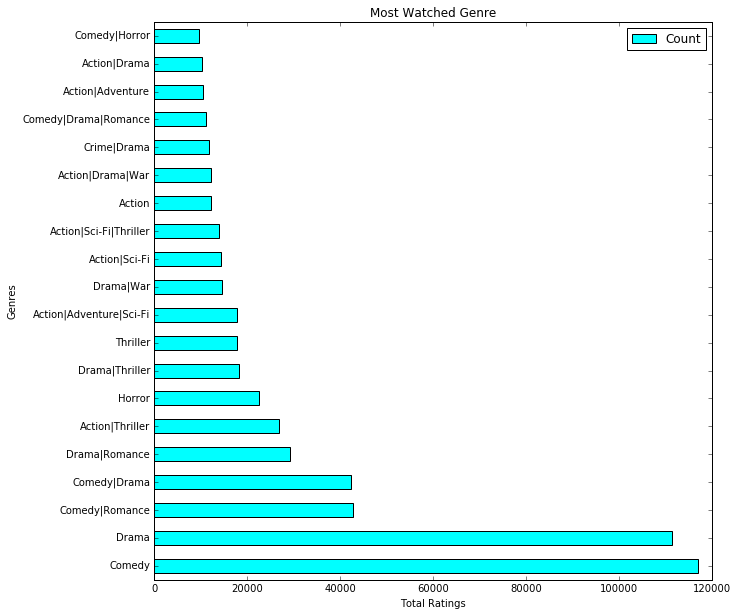

In [39]:
mwg[:20].plot(kind = 'barh', color = 'cyan', figsize=[10, 10])
plt.title('Most Watched Genre')
plt.xlabel('Total Ratings')

#### Least rated movies by Genre

In [40]:
df(total_diff_genre_movies['Rating']['Count'].sort_values()).ix[:5]

,Count
Genres,
Fantasy,1
Film-Noir|Horror,2
Comedy|Film-Noir|Thriller,5
Children's|Fantasy,27
Drama|Romance|Western,29


### Preferred Genre by Occupation

#### Calculating Total Ratings of each Genre based on different Occupation

In [41]:
genre_by_occupation = data.pivot_table(index = ['Name', 'Occupation'],columns = 'Genres', aggfunc='size')

In [42]:
genre_by_occupation.fillna(0)

,Genres,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
Name,Occupation,,,,,,,,,,,,,,,,,,,,,
Other,1,863,783,24,6,32,3,40,3,20,128,...,70,9,3,427,328,26,146,1444,98,442
academic/educator,2,531,440,19,8,30,2,29,3,19,100,...,31,8,1,264,202,11,67,839,28,273
artist,3,318,293,10,1,16,0,20,1,6,68,...,38,3,3,141,122,13,32,634,23,183
clerical/admin,4,1503,1364,83,21,64,6,70,9,74,333,...,63,17,0,517,682,13,154,2157,81,477
college/grad student,5,366,253,8,4,21,2,10,2,10,59,...,5,1,0,118,104,8,21,396,13,171
customer service,6,383,375,6,6,14,2,18,1,8,56,...,17,7,4,172,146,10,42,720,39,192
doctor/health care,7,1548,1240,17,6,58,4,49,2,21,177,...,45,10,10,528,451,26,140,2066,143,820
executive/managerial,8,57,49,1,1,3,0,2,1,1,8,...,0,0,0,16,23,1,4,24,2,9
farmer,9,71,88,0,3,3,0,8,0,2,28,...,10,1,0,22,23,0,9,181,4,38


In [43]:
genre_by_occupation.loc['programmer'].fillna(0)

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1227: FutureWarning: slice indexers when using iloc should be integers and not floating point
  return self._getitem_axis(key, axis=0)


Genres,Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children's|Fantasy,Action|Adventure|Animation|Horror|Sci-Fi,Action|Adventure|Children's,Action|Adventure|Children's|Comedy,Action|Adventure|Children's|Fantasy,Action|Adventure|Children's|Sci-Fi,Action|Adventure|Comedy,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|Thriller,Sci-Fi|Thriller|War,Sci-Fi|War,Thriller,War,Western
Occupation,,,,,,,,,,,,,,,,,,,,,
13,120,144,0,0,2,0,3,0,1,17,...,11,5,6,90,51,4,28,232,34,135


In [44]:
df(genre_by_occupation.Mystery)

,,Mystery
Name,Occupation,
Other,1,126
academic/educator,2,63
artist,3,50
clerical/admin,4,106
college/grad student,5,16
customer service,6,44
doctor/health care,7,111
executive/managerial,8,1
farmer,9,8
